In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O ~/tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O ~/tmp/validation-horse-or-human.zip
  

--2020-02-03 19:30:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response...200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/home/lee/tmp/horse-or-human.zip’

/home/lee/tmp/horse 100%[===================>] 142.65M  5.42MB/s    in 29s     

2020-02-03 19:31:08 (4.88 MB/s) - ‘/home/lee/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-02-03 19:31:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response...200 OK
Length: 11480187

In [20]:

import os
import zipfile

tmp_dir = os.path.expanduser('~/tmp')
try: 
    os.mkdir(tmp_dir)
except: 
    pass

training_dir = os.path.join(tmp_dir, 'horse-or-human')
try: 
    os.mkdir(training_dir)
except: 
    pass

validation_dir = os.path.join(tmp_dir, 'validation-horse-or-human')
try: 
    os.mkdir(training_dir)
except: 
    pass

local_zip = os.path.join(tmp_dir, 'horse-or-human.zip')
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

local_zip = os.path.join(tmp_dir,'validation-horse-or-human.zip')
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

# Directory with our training horse pictures
train_horse_dir = os.path.join(training_dir, 'horses')

# Directory with our training human pictures
train_human_dir = os.path.join(training_dir, 'humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join(validation_dir, 'horses')

# Directory with our training human pictures
validation_human_dir = os.path.join(validation_dir, 'humans')

In [21]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        training_dir, 
        target_size=(300, 300), 
        batch_size=128,
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),  
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [24]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=50,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/50
8/8 [==============================] - 19s 2s/step - loss: 0.6877 - acc: 0.5506 - val_loss: 0.6908 - val_acc: 0.5000
Epoch 2/50
8/8 [==============================] - 19s 2s/step - loss: 0.6733 - acc: 0.5495 - val_loss: 0.6736 - val_acc: 0.5078
Epoch 3/50
8/8 [==============================] - 22s 3s/step - loss: 0.6600 - acc: 0.5967 - val_loss: 0.6341 - val_acc: 0.6016
Epoch 4/50
8/8 [==============================] - 21s 3s/step - loss: 0.6431 - acc: 0.6445 - val_loss: 0.5959 - val_acc: 0.7109
Epoch 5/50
8/8 [==============================] - 20s 2s/step - loss: 0.6139 - acc: 0.6986 - val_loss: 0.9775 - val_acc: 0.5000
Epoch 6/50
8/8 [==============================] - 22s 3s/step - loss: 0.6170 - acc: 0.6763 - val_loss: 0.8826 - val_acc: 0.5117
Epoch 7/50
8/8 [==============================] - 22s 3s/step - loss: 0.5980 - acc: 0.6897 - val_loss: 0.4722 - val_acc: 0.8516
Epoch 8/50
8/8

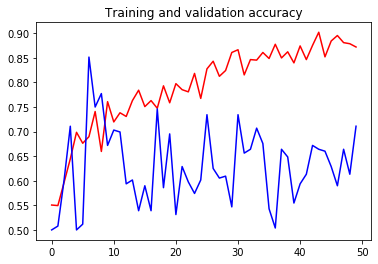

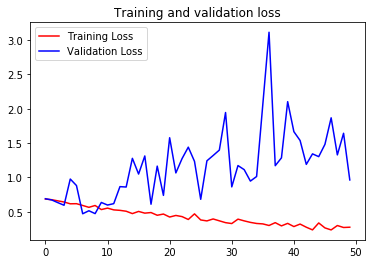

In [25]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()